# Exercises 24 February 2021

## Personal networks, ego networks

On va désormais étudier un réseau concentré contrairement aux réseaux complets que nous avions vus auparavant. 

In [1]:
########### Preparation ##############
# import packages
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
# use pandas to import list of nodes with attributes
nodes = pd.read_table('Ego210_Nodes.txt', sep='\t')
nodes.head()

,ID,Qualification,Gender,Multiplexity,Support,Proximity
0,210,1,1,3,2,4
1,25,2,1,1,1,1
2,27,2,1,3,1,2
3,28,2,1,2,1,1
4,31,2,1,1,1,2


La première ligne de la table est "Ego", c'est-à-dire l'individu 210. 

Les différentes variables de la table sont : 
- Qualification en 6 catégories. 
- Genre : 1 et 2
- Multiplexity : la personne est-elle en contact avec Ego que online, que offline ou les deux (3) ?
- Support = Est-ce que cette personne pourrait fournir du soutien à Ego ?
- Proximity = très proche ou peu proche, codé entre 1 et 4 

Ces variables pourraient potentiellement être intéressantes pour tester la force des liens. 

In [10]:
# Let's select Ego
ego = nodes[nodes.ID==210]
print(ego)

    ID  Qualification  Gender  Multiplexity  Support  Proximity
0  210              1       1             3        2          4


In [11]:
# Select alters 
alters = nodes[nodes.ID != 210]
alters.head()

,ID,Qualification,Gender,Multiplexity,Support,Proximity
1,25,2,1,1,1,1
2,27,2,1,3,1,2
3,28,2,1,2,1,1
4,31,2,1,1,1,2
5,33,2,1,2,1,1


In [14]:
# use pandas to import edgelist as a table
EgoEdges = pd.read_table('Ego210_Edges.txt', sep=',')
EgoEdges.head()

,V1,V2,Type
0,210,25,1
1,210,27,1
2,210,31,1
3,210,34,1
4,210,35,1


On va créer un graphe Ego210. 
- V1 : noeud 1
- V2 : noeud 2
- Type : c'est un attribut de lien. En ligne = 1, Hors ligne = 2. 

Les liens ne sont pas orientés comme bien souvent dans les réseaux qualifiés de personnels. 

C'est un `MultiGraph` qui permet d'introduire des liens de types différents, ou, même si ce n'est pas le cas ici, d'introduire des liens vers soi-même (*loops*). 

Remarque : l'attribut `edge_attr = 'Type'` ajoute l'attribut type afin de garder la double nature des liens. 



In [18]:
# generate graph from pandas edgelist
# it is an undirected multigraph
# a 'multigraph' accepts multiple types of ties (here, online and offline)

Ego210 = nx.from_pandas_edgelist(EgoEdges, 'V1', 'V2', edge_attr ='Type', create_using=nx.MultiGraph()) 
print(nx.info(Ego210))

Name: 
Type: MultiGraph
Number of nodes: 51
Number of edges: 114
Average degree:   4.4706


Si on l'avait chargé comme graphe normal, ce qui change c'est le nombre d'*edges* qui change et diminue. Il y en a désormais 71 au lieu de 114. 

In [19]:
# Note: if we had created it as a simple undirected graph, networkx would have omitted multiple ties
test = nx.from_pandas_edgelist(EgoEdges, 'V1', 'V2', create_using=nx.Graph()) 
print(nx.info(test))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 71
Average degree:   2.7843


In [20]:
# match nodes of graph with attributes of nodes
NodeData = nodes.set_index('ID').to_dict('index').items()
Ego210.add_nodes_from(NodeData)

# view results
print(Ego210.nodes(data=True))

[(210, {'Qualification': 1, 'Gender': 1, 'Multiplexity': 3, 'Support': 2, 'Proximity': 4}), (25, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 1, 'Support': 1, 'Proximity': 1}), (27, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (31, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 1, 'Support': 1, 'Proximity': 2}), (34, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (35, {'Qualification': 2, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 2}), (39, {'Qualification': 4, 'Gender': 1, 'Multiplexity': 3, 'Support': 2, 'Proximity': 2}), (95, {'Qualification': 1, 'Gender': 2, 'Multiplexity': 3, 'Support': 2, 'Proximity': 3}), (106, {'Qualification': 2, 'Gender': 2, 'Multiplexity': 3, 'Support': 1, 'Proximity': 3}), (110, {'Qualification': 4, 'Gender': 2, 'Multiplexity': 3, 'Support': 1, 'Proximity': 1}), (112, {'Qualification': 6, 'Gender': 1, 'Multiplexity': 3, 'Support': 1, 'Proximity': 1}), (124,

In [21]:
# view edges
print(Ego210.edges(data=True))

[(210, 25, {'Type': 1}), (210, 27, {'Type': 1}), (210, 27, {'Type': 2}), (210, 31, {'Type': 1}), (210, 34, {'Type': 1}), (210, 34, {'Type': 2}), (210, 35, {'Type': 1}), (210, 35, {'Type': 2}), (210, 39, {'Type': 1}), (210, 39, {'Type': 2}), (210, 95, {'Type': 1}), (210, 95, {'Type': 2}), (210, 106, {'Type': 1}), (210, 106, {'Type': 2}), (210, 110, {'Type': 1}), (210, 110, {'Type': 2}), (210, 112, {'Type': 1}), (210, 112, {'Type': 2}), (210, 124, {'Type': 1}), (210, 124, {'Type': 2}), (210, 132, {'Type': 1}), (210, 132, {'Type': 2}), (210, 140, {'Type': 1}), (210, 140, {'Type': 2}), (210, 260, {'Type': 1}), (210, 260, {'Type': 2}), (210, 270, {'Type': 1}), (210, 290, {'Type': 1}), (210, 317, {'Type': 1}), (210, 317, {'Type': 2}), (210, 320, {'Type': 1}), (210, 330, {'Type': 1}), (210, 330, {'Type': 2}), (210, 340, {'Type': 1}), (210, 340, {'Type': 2}), (210, 350, {'Type': 1}), (210, 350, {'Type': 2}), (210, 360, {'Type': 1}), (210, 370, {'Type': 1}), (210, 370, {'Type': 2}), (210, 410, 

Quand on fait un draw ça met pas les trucs doubles ? 

Définir une disposition des noeuds en Layout, je vais utiliser le sprint layout. Je positionne les noeuds selon ce layout et ensuite je dessine les edges avec une fonctionnalités de matplotlib de manière à ce qu'on puisse voir les liens différents entre type 1 et type 2. 

Question : quelle courbe est de quel type ? C'est vrai, on ne pense pas à le distinguer, on pourrait faire varier la couleur en fonction du type (ou le type pointillé ou continu). N'y avait pas pensé mais ne l'a pas fait mais c'est possible (TODO). 

Il place bien automatiquement le noeud 210 au centre. C'est le noeud qui a le plus de loin donc l'algorithme le place dans une position centrale. Il a fait les liens en doubles courbés. 
Les noeuds qui ont tous un double lien ont les 2 liens qui apparaissent bien. 
On voit bien les liens de 2 types qui apparaissent. 
On peut avoir un multigraphe complet ou un réseau personnel avec des liens d'un seul type mais là dans notre cas particulier c'est les deux ! 


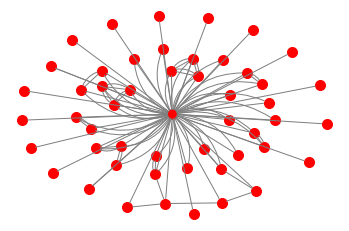

In [23]:
# Visualization

# define layout
pos = nx.spring_layout(Ego210)
# draw nodes according to layoabsut
nx.draw_networkx_nodes(Ego210, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", #multi-graph but not oriented
                                color='gray',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                #arc3,rad=rrr : permet de faire des courbes plutôt que des lignes
                                #au lieu de donner une même valeur pour toutes les courbes, je donne
                                #une valeur différente pour type 1 et type 2. 
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),
                                ),
                )
plt.axis('off')
plt.show()

## Subset graph: offline-only, online-only, without Ego

Je veux par exemple prendre les liens d'un type (ici off-line) et voir à quoi ça ressemble. 
On peut donc créer un sous-ensemble de graphe que l'on appelle off-line. 
Offline est un ensemble de liens qui va chercher dans la liste des edges d'origine (u, v, d) = (v1, v2 et le type) car les edges d'origine ont le type en élément. 

In [24]:
## Subset graph: take only offline ties

# take subset of relevant edges
offline = [(u, v) for (u, v, d) in Ego210.edges(data=True) if d["Type"] ==1]

# create graph
Ego210Offline = nx.Graph(offline)
print(nx.info(Ego210Offline))

Name: 
Type: Graph
Number of nodes: 46
Number of edges: 65
Average degree:   2.8261


Ce sont les noeuds et les liens qui concernent que les noeuds off-line. On peut le visualiser comme ça, mais on peut avoir envie de le matcher quand même avec notre liste de noeud initiale, ce qui va donner des isolés forcément car il y a 5 noeuds qui n'ont pas de relations hors ligne mais ça permet de comparer plus facilement avec le noeud d'origine. 

In [25]:
# match with nodes table to add isolates
Ego210Offline.add_nodes_from(NodeData)

# view results
print(nx.info(Ego210Offline))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 65
Average degree:   2.5490


On va pour visualiser utiliser la même stratégie et le même mositionnement que tout à l'heure. Donc je garde le pos de précédemment, même si les liens vont être ici différents. Il y a moins de lien et il y en a plus qui sont doubles. 

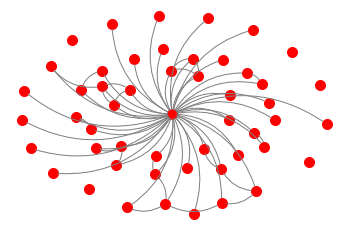

In [26]:
# Visualization

# keep the same layout as before ("pos") to compare
# draw nodes according to this layout
nx.draw_networkx_nodes(Ego210Offline, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210Offline.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-",
                                color='gray',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3"),
                                )
plt.axis('off')
plt.show()

##### Exercise: now, repeat the same for online ties

Name: 
Type: Graph
Number of nodes: 36
Number of edges: 49
Average degree:   2.7222
Name: 
Type: Graph
Number of nodes: 51
Number of edges: 49
Average degree:   1.9216


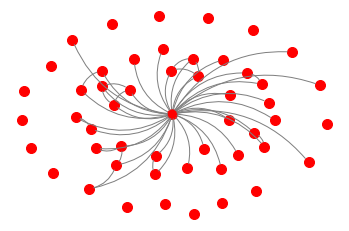

In [27]:
## Subset graph: take only offline ties

# take subset of relevant edges
online = [(u, v) for (u, v, d) in Ego210.edges(data=True) if d["Type"] ==2]

# create graph
Ego210Online = nx.Graph(online)
print(nx.info(Ego210Online))

# match with nodes table to add isolates
Ego210Online.add_nodes_from(NodeData)

# view results
print(nx.info(Ego210Online))

# Visualization

# keep the same layout as before ("pos") to compare
# draw nodes according to this layout
nx.draw_networkx_nodes(Ego210Online, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210Online.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-",
                                color='gray',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=0.3"),
                                )
plt.axis('off')
plt.show()

##### Remove Ego from the graphe

Faire le graphe sans Ego car le fait qu'Ego ait des relations avec tout le monde est une information un peu redondante. On sait déjà enlever un noeud. Mais il vaut mieux faire une copie et changer la copie, mais de manière à garder quand même le graphe d'origine. 

In [28]:
# Graph without Ego
Ego210_noEgo = Ego210.copy()
Ego210_noEgo.remove_node(210)

In [29]:
# View results
print(nx.info(Ego210_noEgo))

Name: 
Type: MultiGraph
Number of nodes: 50
Number of edges: 34
Average degree:   1.3600


2 choses pour interpréter la densité faible. 

1.  D'une part le réseau n'est pas très dense. Ce n'est pas très dense car les personnes qui ont des soucis de santé les personnes préfèrent garder des relations séparées pour que les gens ne puissent pas parler entre eux. C'est une sorte de protection. 

2. Il y a aussi un sujet de méthode. Enquête qui demande à Ego qui sont vos alters (pas dit comme ça) et les relation entre eux. Il est aussi peut-être possible qu'Ego ne connaissent pas toutes les relations de ses alters. 

##### Exercise: now, visualize it with the same layout as Ego210

Visualisation : on peut ou non garder le même layout. Rajouter la couleur avec les types pour la version rendue. 

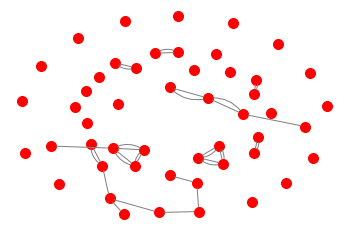

In [32]:
# Visualization

# define layout
# pos = nx.spring_layout(Ego210)
# draw nodes according to layoabsut
nx.draw_networkx_nodes(Ego210_noEgo, pos, node_color = 'r', node_size = 100, alpha = 1)
# use matplotlib to draw edges
ax = plt.gca()
for e in Ego210_noEgo.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", #multi-graph but not oriented
                                color='gray',
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                #arc3,rad=rrr : permet de faire des courbes plutôt que des lignes
                                #au lieu de donner une même valeur pour toutes les courbes, je donne
                                #une valeur différente pour type 1 et type 2. 
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])),
                                ),
                )
plt.axis('off')
plt.show()

##### Weighted graphe

On peut avoir envie de faire un graphe pondéré. On peut interpréter un lien plus fort si le lien est double. 
Si une personne a un contact fort avec quelqu'un à la fois en ligne et hors ligne est sûrement plus fort qu'en ligne. Mais en temps de Covid-19 bien sûr cette interprétation n'est pas forcément la bonne ! 
On va donc transformer ce graphe avec cette idée en tête. 

In [39]:
## Create weighted undirected graph from multigraph
# Idea : each tie has value 2 if it is both online and offline, 1 otherwise
# We can interpret multiplexity as tie strength

Ego210WUG = nx.Graph()

for u,v,data in Ego210.edges(data=True):
    w = 1   
    if Ego210WUG.has_edge(u,v):
        Ego210WUG[u][v]['weight'] += w
    else:
        Ego210WUG.add_edge(u, v, weight=w)

print(nx.info(Ego210WUG))

Name: 
Type: Graph
Number of nodes: 51
Number of edges: 71
Average degree:   2.7843


51 noeuds, il y a aussi Ego. 
71 edges : chiffre qu'on a déjà rencontrés : nombre de liens unique. C'est bien ce qu'on voulait mais la différence par rapport au cas naïf de test c'est qu'ici on a donné un poids aux liens. 

On fait apparaître la liste des edges de ce nouvel objet. le poids vaut 1 si le lien apparaissait une fois et 2 s'ils apparaissait 2 fois. 


In [40]:
print(Ego210WUG.edges(data=True))

[(210, 25, {'weight': 1}), (210, 27, {'weight': 2}), (210, 31, {'weight': 1}), (210, 34, {'weight': 2}), (210, 35, {'weight': 2}), (210, 39, {'weight': 2}), (210, 95, {'weight': 2}), (210, 106, {'weight': 2}), (210, 110, {'weight': 2}), (210, 112, {'weight': 2}), (210, 124, {'weight': 2}), (210, 132, {'weight': 2}), (210, 140, {'weight': 2}), (210, 260, {'weight': 2}), (210, 270, {'weight': 1}), (210, 290, {'weight': 1}), (210, 317, {'weight': 2}), (210, 320, {'weight': 1}), (210, 330, {'weight': 2}), (210, 340, {'weight': 2}), (210, 350, {'weight': 2}), (210, 360, {'weight': 1}), (210, 370, {'weight': 2}), (210, 410, {'weight': 2}), (210, 411, {'weight': 2}), (210, 420, {'weight': 1}), (210, 430, {'weight': 1}), (210, 440, {'weight': 1}), (210, 450, {'weight': 1}), (210, 511, {'weight': 2}), (210, 729, {'weight': 1}), (210, 828, {'weight': 2}), (210, 1620, {'weight': 2}), (210, 1719, {'weight': 2}), (210, 1815, {'weight': 1}), (210, 1916, {'weight': 1}), (210, 2113, {'weight': 2}), (2

Une manière assez intuitive de visualiser les choses. On a pas pu le voir avant mais on peut le faire maintenant de manière intuitive. En utilisant l'épaisseur du trait. On le fait ici sur un réseau personnel mais on pourrait aussi le faire avec des réseaux complexes. Il faut avoir des attributs de liens interprétables. 
Plusieurs manières de faire : une solution est de définir 2 sous-ensemble (strong and weaks ties) et on fait varier en fonction l'épaisseur des liens. 

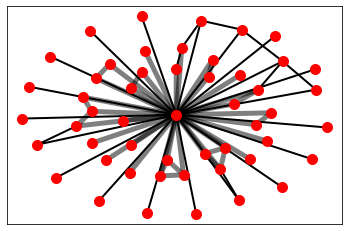

In [44]:
# Visualization

strongTies = [(u, v) for (u, v, d) in Ego210WUG.edges(data=True) if d["weight"] > 1]
weakTies = [(u, v) for (u, v, d) in Ego210WUG.edges(data=True) if d["weight"] <= 1]

pos = nx.spring_layout(Ego210WUG)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Ego210WUG, pos, node_color = 'r', node_size = 100, alpha = 1)

# edges
nx.draw_networkx_edges(Ego210WUG, pos, edgelist=strongTies, width=5, alpha=0.5)  # strong ties
nx.draw_networkx_edges(Ego210WUG, pos, edgelist=weakTies, width=2, alpha=1) # weak ties


## Personal network composition indicators

In [50]:
## Blau index

# recall it is equal to 1 - p1^2 - p2^2 - ... - pk^2

# first create a function
def blau(df, col):
    return (1- ((df[col].value_counts() / df[col].count()) ** 2).sum())

# then apply it to the 'alters' table, attribute 'Qualification'
blau(alters, 'Qualification')

0.6624

In [73]:
# NB if you need to see how many/ which categories are represented in a categorical variables
print (alters['Qualification'].unique())

[2 4 1 6 3 5]


In [74]:
# Index of Qualitative Variation
# equal to Blau * k/(k-1)
# (normalized version)
k = len(list(alters['Qualification'].unique()))
print("k :",k)
blau(alters, 'Qualification')*(k/(k-1))

k : 6


0.7948799999999999

In [76]:
# Herfindahl-Hirschman index (HHI)
# equal to 1 - Blau
1 - blau(alters, 'Qualification')

0.3376

#### Exercise: calculate these indexes for the other attributes (Gender, Multiplexity, Support and Proximity)

In [80]:
variables = ['Qualification','Gender','Multiplexity','Support','Proximity']

print('Blau index\n')
for var in variables:
    print(var,": ",blau(alters, var))
    
print('\nIndex of Qualitative Variation\n')
for var in variables:
    k = len(list(alters[var].unique()))
    blau(alters, var)*(k/(k-1))
    print(var,"(k =",k,") :",blau(alters, var)*(k/(k-1)))
    
print('\nHerfindahl-Hirschman index \n')
for var in variables:
    print(var,": ",1 - blau(alters, var))

Blau index

Qualification :  0.6624
Gender :  0.4872000000000001
Multiplexity :  0.54
Support :  0.4351999999999999
Proximity :  0.5751999999999999

Index of Qualitative Variation

Qualification (k = 6 ) : 0.7948799999999999
Gender (k = 2 ) : 0.9744000000000002
Multiplexity (k = 3 ) : 0.81
Support (k = 2 ) : 0.8703999999999998
Proximity (k = 3 ) : 0.8627999999999999

Herfindahl-Hirschman index 

Qualification :  0.3376
Gender :  0.5127999999999999
Multiplexity :  0.45999999999999996
Support :  0.5648000000000001
Proximity :  0.42480000000000007


## Structural measures

In [ ]:
# find isolates (components consisting in 1 node, for example in the offline-only network)
list(nx.isolates(Ego210Offline)) 

In [ ]:
# density (for ex. in the original Ego210 graph)
nx.density(Ego210) 

In [ ]:
# Transitivity (cannot do it in Ego210 because not implemented for MultiGraph type)
print(nx.transitivity(Ego210WUG)) 

##### In principle, all structural measures can be calculated on a personal / ego network. Just be aware of graph type and relevance of each measure (par ex. reciprocity is not meaningful in un undirected graph).

## Exercises for next week

##### Take the advice network of Lazega's lawyers.

##### Extract the ego-centred network of one of the lawyers i (i = 1,..., 71).
###### NB The networkx function to extract the ego graph of i is: Egoi = nx.ego_graph(G, i)

##### Describe the ego-network of lawyer i through composition indicators (Blau index etc.) for relevant attributes, and structure indicators (density etc.).

##### Bonus: repeat the exercise with the multigraph that results from combining advice, friendship and cowork.

##### Please email to paola.tubaro@lri.fr by Tuesday, March 2, 2pm.
